In [1]:
import tensorflow as tf

print(tf.__version__)

2.0.0


In [2]:
import os
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)


In [3]:
# 定义网络
net = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96,kernel_size=11,strides=4,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    tf.keras.layers.Conv2D(filters=256,kernel_size=5,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    tf.keras.layers.Conv2D(filters=384,kernel_size=3,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(filters=384,kernel_size=3,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation='sigmoid')
])


#### 虽然论文中AlexNet使用ImageNet数据集，但因为ImageNet数据集训练时间较长，我们仍用前面的Fashion-MNIST数据集来演示AlexNet。读取数据的时候我们额外做了一步将图像高和宽扩大到AlexNet使用的图像高和宽224。这个可以通过tf.image.resize_with_pad来实现

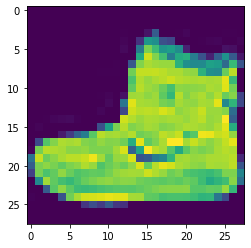

<Figure size 360x360 with 0 Axes>

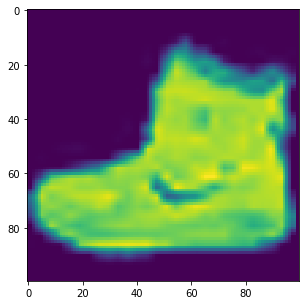

In [4]:
# 获取数据
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 熟悉一下，tf.image.resize_with_pad 函数
def resize(x):
    x = tf.cast(x, tf.float32)
    x = tf.reshape(x, (x.shape[0], x.shape[1], 1))
    x = tf.image.resize_with_pad(image=x, target_height=100, target_width=100, method='bilinear')
    x = tf.squeeze(x)
    return x

img = x_train[0]
img2 = resize(img)
plt.imshow(img)
plt.figure(figsize=(5,5))
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(img2)
plt.show()

In [5]:
# 数据预处理
def data_scale(x, y):
    x = tf.cast(x, tf.float32)
    x = x / 255.0
    x = tf.reshape(x, (x.shape[0], x.shape[1], 1))
    x = tf.image.resize_with_pad(image=x, target_height=224,target_width=224)
    
    return x, y

train_db = tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(20).map(data_scale).batch(256)
test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test)).shuffle(20).map(data_scale).batch(256)

In [6]:
# 定义优化器和损失函数
optimizer = tf.keras.optimizers.SGD(lr=1e-1)
loss = tf.keras.losses.sparse_categorical_crossentropy
net.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

net.fit_generator(train_db, epochs=2, validation_data=test_db)

Epoch 1/2
235/235 [==============================] - 37s 158ms/step - loss: 1.5105 - accuracy: 0.2605 - val_loss: 0.8822 - val_accuracy: 0.6663
Epoch 2/2
235/235 [==============================] - 35s 150ms/step - loss: 0.5995 - accuracy: 0.7492 - val_loss: 0.7751 - val_accuracy: 0.7420


In [7]:
net.summary(line_length=100)
# net.save()

Model: "sequential"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
conv2d (Conv2D)                              multiple                                11712          
____________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)                 multiple                                0              
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                            multiple                                614656         
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)               multiple                                0              
_______________________________________________________________________

In [8]:
net.evaluate_generator(generator=test_db)

[0.7806016147136688, 0.742]

In [9]:
for layer in net.layers:
    print(layer.name)
#     print(layer.get_weights())

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
conv2d_3
conv2d_4
max_pooling2d_2
flatten
dense
dropout
dense_1
dropout_1
dense_2
